In [19]:
! pip install geopandas shapely rasterio Pillow

In [20]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from PIL import Image
from rasterio.plot import show
import random
from pyproj import Proj, transform, Transformer

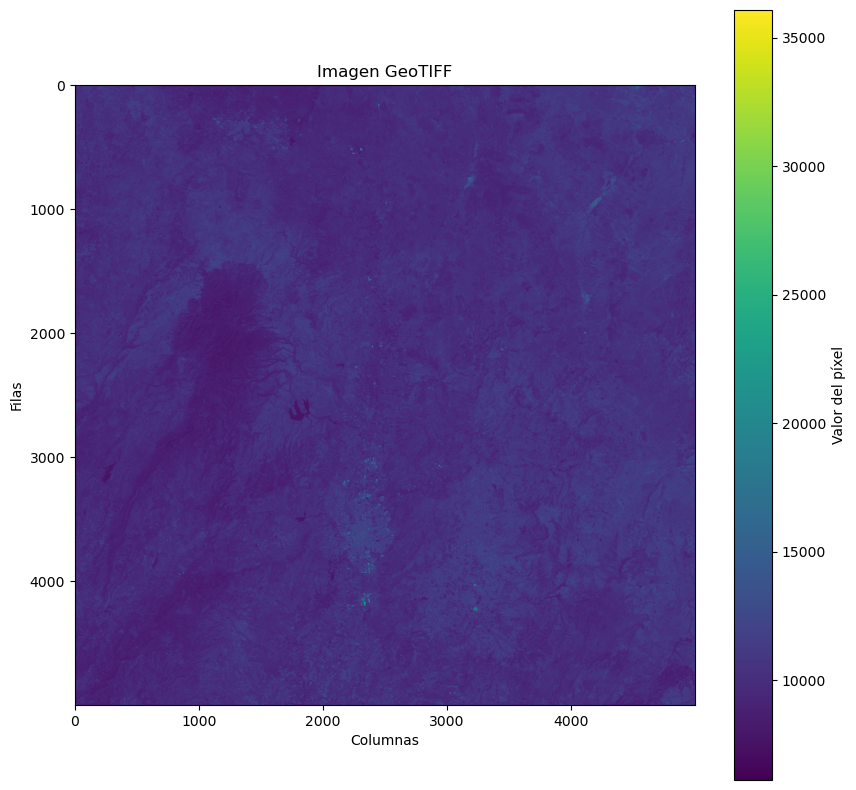

In [21]:
ruta_tiff = "imagen.tif"
with rasterio.open(ruta_tiff) as src:
    srs_raster = src.crs.to_proj4()
with rasterio.open(ruta_tiff) as src:
    # Lee la banda 1 del GeoTIFF
    img = src.read(1)

    # Utiliza imshow para mostrar la imagen
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='viridis')

    # Muestra el título y los ejes
    plt.title('Imagen GeoTIFF')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')

    # Muestra el colorbar
    cbar = plt.colorbar(label='Valor del píxel')

    # Muestra la trama
    plt.show()


In [22]:
ruta_csv = "denue.csv"
try:
    df = pd.read_csv(ruta_csv, encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' fails, try 'latin1' encoding
    df = pd.read_csv(ruta_csv, encoding='latin1')
df

C:\Users\ANDRES.PEREZ\AppData\Local\Temp\ipykernel_18528\1814713611.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv, encoding='latin1')


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,6862345,01001115119000031001000000U2,AGROPECUARIA CHARCOS DE QUEZADA,AGROPECUARIA CHARCOS DE QUEZADA SOCIEDAD DE PR...,115119,Otros servicios relacionados con la agricultura,6 a 10 personas,AVENIDA,UNIVERSIDAD,CALLE,...,Aguascalientes,0233,9,4492853716,NaN,NaN,Fijo,21.906992,-102.309807,2019-04
1,6905212,01001115119000041000000000U1,AGROPECUARIO LOS ALAMITOS,NaN,115119,Otros servicios relacionados con la agricultura,0 a 5 personas,CALLE,J. ENCARNACION PAYEN,CALLE,...,Aguascalientes,0322,18,4499960472,NaN,NaN,Fijo,21.889926,-102.314009,2019-11
2,6166248,01007112512000012001000000U8,CENTRO ACUÍCOLA PABELLON DE HIDALGO,SAGARPA,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,NINGUNO,CALLE,...,SEMARNAT [Centro Acuícola],0078,800,NaN,NaN,WWW.GOB.MX,Fijo,22.167778,-102.345556,2010-07
3,6166233,01010112512000011000000000U9,G. ACUÍCOLA SANTA ROSA,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,CARRETERA,SECTOR DE PRODUCCION N0 1 TERREMOTO EL LLANO A...,CARRETERA,...,Santa Rosa [Granja Acuícola],0069,800,NaN,NaN,NaN,Fijo,21.956298,-101.997312,2014-12
4,6166234,01003112512000031001000000U7,GRANJA ACUICOLA ARROYO DE LOS CABALLOS,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,PROLONGACION,CUAUHTUMOC,CARRETERA,...,Arroyo Ojocalientillo,0100,2,4492741517,MARTINSAU2720@HOTMAIL.COM,NaN,Fijo,21.837255,-102.710931,2014-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61641,24371,01001931210000451001000000U1,VISITADURIA DE NOTARIAS,SECRETARÍA DE GOBIERNO DEL ESTADO,931210,Administración pública en general,11 a 30 personas,CALLE,SARH,CALLE,...,Aguascalientes,0816,45,NaN,NaN,NaN,Fijo,21.875367,-102.279581,2014-12
61642,33009,01001931210001573000000000U1,VOCALÍA DEL REGISTRO FEDERAL DE ELECTORES,INSTITUTO NACIONAL ELECTORAL,931210,Administración pública en general,11 a 30 personas,AVENIDA,CONVENCION DE 1914 SUR,CALLE,...,Aguascalientes,0888,17,NaN,FELIPE.REYESRO@INE.ORG,WWW.INE.COM.MX,Fijo,21.865938,-102.289821,2014-12
61643,50694,01010931610000081000000000U8,ZONA ESCOLAR 18 DE TELESECUNDARIA,INSTITUTO DE EDUCACIÓN DE AGUASCALIENTES,931610,Actividades administrativas de instituciones d...,0 a 5 personas,CALLE,GUADALUPE VICTORIA,CALLE,...,Palo Alto,0158,35,4969673226.0,NaN,NaN,Fijo,21.919051,-101.959755,2014-12
61644,40740,01001931410000573000000000U8,ZONA MILITAR,SECRETARÍA DE LA DEFENSA NACIONAL,931410,Impartición de justicia y mantenimiento de la ...,11 a 30 personas,CALLE,RIO LERMA,OTRO (ESPECIFIQUE),...,Aguascalientes,2013,25,NaN,NaN,NaN,Fijo,21.893411,-102.323357,2014-12


In [23]:
# Selecciona las columnas deseadas
df_limpio = df[["codigo_act", "per_ocu", "latitud", "longitud"]].copy()
df_limpio["codigo_act"] = df_limpio["codigo_act"].astype(str).str.slice(0, 2)
df_limpio["codigo_act"] = df_limpio["codigo_act"].astype(float)
# Muestra el nuevo DataFrame
print(df_limpio)

       codigo_act           per_ocu    latitud    longitud
0            11.0   6 a 10 personas  21.906992 -102.309807
1            11.0    0 a 5 personas  21.889926 -102.314009
2            11.0    0 a 5 personas  22.167778 -102.345556
3            11.0   6 a 10 personas  21.956298 -101.997312
4            11.0    0 a 5 personas  21.837255 -102.710931
...           ...               ...        ...         ...
61641        93.0  11 a 30 personas  21.875367 -102.279581
61642        93.0  11 a 30 personas  21.865938 -102.289821
61643        93.0    0 a 5 personas  21.919051 -101.959755
61644        93.0  11 a 30 personas  21.893411 -102.323357
61645        93.0  11 a 30 personas  21.875196 -102.281411

[61646 rows x 4 columns]


In [24]:
df_limpio['per_ocu'] = df_limpio['per_ocu'].astype(str).str.extract('(\d+)').astype(float)
# Verifica si hay valores nulos en el DataFrame
valores_nulos = df_limpio.isnull().sum()

# Muestra la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos)

# Muestra el tipo de dato por columna
tipos_de_dato = df_limpio.dtypes

# Muestra el tipo de dato por columna
print("\nTipo de dato por columna:")
print(tipos_de_dato)

Valores nulos por columna:
codigo_act    0
per_ocu       0
latitud       0
longitud      0
dtype: int64

Tipo de dato por columna:
codigo_act    float64
per_ocu       float64
latitud       float64
longitud      float64
dtype: object


In [26]:
# Crea una columna 'geometry' utilizando las columnas de latitud y longitud
geometry = [Point(xy) for xy in zip(df_limpio['longitud'], df_limpio['latitud'])]
df_limpio['geometry'] = geometry

# Convierte el DataFrame de pandas en un GeoDataFrame de GeoPandas
gdf = gpd.GeoDataFrame(df_limpio, geometry='geometry')


srs_gdf = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
transformador = Transformer.from_proj(Proj(srs_gdf), Proj(srs_raster))
gdf["geometry"] = gdf["geometry"].apply(lambda geom: Point(transformador.transform(geom.x, geom.y)))

# Muestra el GeoDataFrame
gdf

,codigo_act,per_ocu,latitud,longitud,geometry
0,11.0,6.0,21.906992,-102.309807,POINT (2468147.992 1094190.873)
1,11.0,0.0,21.889926,-102.314009,POINT (2467711.796 1092292.619)
2,11.0,0.0,22.167778,-102.345556,POINT (2464542.021 1123223.156)
3,11.0,6.0,21.956298,-101.997312,POINT (2500276.264 1099643.835)
4,11.0,0.0,21.837255,-102.710931,POINT (2426869.540 1086576.086)
...,...,...,...,...,...
61641,93.0,11.0,21.875367,-102.279581,POINT (2471248.754 1090665.178)
61642,93.0,11.0,21.865938,-102.289821,POINT (2470193.605 1089617.948)
61643,93.0,0.0,21.919051,-101.959755,POINT (2504137.271 1095499.347)
61644,93.0,11.0,21.893411,-102.323357,POINT (2466751.468 1092682.561)


In [27]:
# Abre el archivo GeoTIFF con rasterio
with rasterio.open(ruta_tiff) as src:
    # Obtiene información sobre la imagen (esto se realiza solo una vez)
    dimensiones = src.shape
    resolucion = src.res
    sistema_referencia = src.crs

    print(f"Dimensiones de la imagen: {dimensiones}")
    print(f"Resolución de la imagen: {resolucion}")
    print(f"Sistema de referencia de coordenadas (CRS): {sistema_referencia}")

    # Itera sobre los puntos del GeoDataFrame
    for index, row in gdf.iterrows():
        # Obtiene las coordenadas del punto
        x, y = row['geometry'].x, row['geometry'].y
        
        # Convierte las coordenadas del punto a las coordenadas de píxeles en el GeoTIFF
        col, row = src.index(x, y)
        
        # Lee el valor del píxel en la imagen (esto es solo para obtener las dimensiones)
        pixel_value = src.read(1, window=((row, row + 1), (col, col + 1)))

Dimensiones de la imagen: (5000, 5000)
Resolución de la imagen: (30.0, 30.0)
Sistema de referencia de coordenadas (CRS): PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown based on GRS80 ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",12],PARAMETER["longitude_of_center",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [28]:
if gdf.geometry is None:
    print("Advertencia: El GeoDataFrame no tiene un CRS definido. Asignando un CRS.")
else:
    print("No problema")

No problema


In [29]:
# Abre el archivo raster
with rasterio.open(ruta_tiff) as src:
    # Obtiene las dimensiones del raster
    width = src.width
    height = src.height

    # Obtiene coordenadas de un punto al azar dentro del raster
    x_random = random.uniform(src.bounds.left, src.bounds.right)
    y_random = random.uniform(src.bounds.bottom, src.bounds.top)

print(f"Coordenada al azar: ({x_random}, {y_random})")


Coordenada al azar: (2448119.5465992484, 1058161.3937421432)


                              geometry  valor_pixel_banda_1  \
0      POINT (2468147.992 1094190.873)              11137.0   
1      POINT (2467711.796 1092292.619)              10171.0   
2      POINT (2464542.021 1123223.156)              10652.0   
3      POINT (2500276.264 1099643.835)              16164.0   
4      POINT (2426869.540 1086576.086)              11149.0   
...                                ...                  ...   
61641  POINT (2471248.754 1090665.178)               9923.0   
61642  POINT (2470193.605 1089617.948)              10152.0   
61643  POINT (2504137.271 1095499.347)              11329.0   
61644  POINT (2466751.468 1092682.561)              10938.0   
61645  POINT (2471060.526 1090646.524)              10194.0   

       valor_pixel_banda_2  valor_pixel_banda_3  valor_pixel_banda_4  \
0                  12547.0              14279.0              19063.0   
1                  11243.0              12442.0              15884.0   
2                  12410.0 

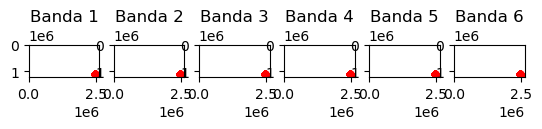

In [30]:
import numpy as np

# Abre el archivo GeoTIFF con rasterio
with rasterio.open(ruta_tiff) as src:
    # Obtén el número de bandas en la imagen
    num_bandas = src.count
    
    # Itera sobre las bandas
    for banda in range(1, num_bandas + 1):
        # Itera sobre los puntos del GeoDataFrame y obtén los valores de los píxeles correspondientes
        for index, row in gdf.iterrows():
            # Obtiene las coordenadas del punto
            x, y = row['geometry'].x, row['geometry'].y
            
            # Convierte las coordenadas del punto a las coordenadas de píxeles en el GeoTIFF
            col, row = src.index(x, y)
            
            # Lee el valor del píxel en la imagen para la banda actual
            pixel_value = src.read(banda, window=((row, row + 1), (col, col + 1)))
            
            # Asigna el valor del píxel a una columna específica en el GeoDataFrame
            nombre_columna = f'valor_pixel_banda_{banda}'
            gdf.at[index, nombre_columna] = pixel_value[0, 0]

# Muestra el GeoDataFrame con los valores de los píxeles de todas las bandas
print(gdf[['geometry', 'valor_pixel_banda_1', 'valor_pixel_banda_2', 'valor_pixel_banda_3', 'valor_pixel_banda_4', 'valor_pixel_banda_5', 'valor_pixel_banda_6']])

# Muestra las imágenes raster de todas las bandas con el punto del GeoDataFrame superpuesto
for banda in range(1, num_bandas + 1):
    plt.subplot(1, num_bandas, banda)
    plt.imshow(rasterio.open(ruta_tiff).read(banda), cmap='viridis')
    gdf.plot(ax=plt.gca(), color='red', markersize=10)
    plt.title(f'Banda {banda}')

plt.show()


In [31]:
gdf

,codigo_act,per_ocu,latitud,longitud,geometry,valor_pixel_banda_1,valor_pixel_banda_2,valor_pixel_banda_3,valor_pixel_banda_4,valor_pixel_banda_5,valor_pixel_banda_6
0,11.0,6.0,21.906992,-102.309807,POINT (2468147.992 1094190.873),11137.0,12547.0,14279.0,19063.0,22812.0,18116.0
1,11.0,0.0,21.889926,-102.314009,POINT (2467711.796 1092292.619),10171.0,11243.0,12442.0,15884.0,19669.0,16381.0
2,11.0,0.0,22.167778,-102.345556,POINT (2464542.021 1123223.156),10652.0,12410.0,14172.0,17736.0,20618.0,18006.0
3,11.0,6.0,21.956298,-101.997312,POINT (2500276.264 1099643.835),16164.0,17520.0,18555.0,20313.0,19293.0,15485.0
4,11.0,0.0,21.837255,-102.710931,POINT (2426869.540 1086576.086),11149.0,12826.0,14498.0,17868.0,21061.0,18853.0
...,...,...,...,...,...,...,...,...,...,...,...
61641,93.0,11.0,21.875367,-102.279581,POINT (2471248.754 1090665.178),9923.0,10904.0,11684.0,14342.0,16544.0,14272.0
61642,93.0,11.0,21.865938,-102.289821,POINT (2470193.605 1089617.948),10152.0,11199.0,12402.0,15648.0,19539.0,16122.0
61643,93.0,0.0,21.919051,-101.959755,POINT (2504137.271 1095499.347),11329.0,12824.0,14695.0,18319.0,22482.0,20415.0
61644,93.0,11.0,21.893411,-102.323357,POINT (2466751.468 1092682.561),10938.0,12332.0,13853.0,17396.0,21508.0,18259.0


In [32]:
# Abre el archivo GeoTIFF con rasterio
with rasterio.open(ruta_tiff) as src:
    # Obtén las descripciones de las bandas
    descriptions = src.descriptions

# Muestra las descripciones de las bandas
for i, desc in enumerate(descriptions, start=1):
    print(f"Banda {i}: {desc}")

Banda 1: None
Banda 2: None
Banda 3: None
Banda 4: None
Banda 5: None
Banda 6: None


In [35]:
gdf['valor_pixel_banda_1'] = gdf['valor_pixel_banda_1'].astype('float')
gdf['valor_pixel_banda_2'] = gdf['valor_pixel_banda_2'].astype('float')
gdf['valor_pixel_banda_3'] = gdf['valor_pixel_banda_3'].astype('float')
gdf['valor_pixel_banda_4'] = gdf['valor_pixel_banda_4'].astype('float')
gdf['valor_pixel_banda_5'] = gdf['valor_pixel_banda_5'].astype('float')
gdf['valor_pixel_banda_6'] = gdf['valor_pixel_banda_6'].astype('float')
# Reemplaza 'nombre_del_archivo.geojson' con el nombre que desees para el archivo GeoJSON
archivo_salida = 'geoespacial.geojson'

# Exporta el GeoDataFrame a GeoJSON
gdf.to_file(archivo_salida, driver='GeoJSON')